In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
# Conrect Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import the train and test datasets from their respective CSV files
train_df = pd.read_csv("/content/drive/MyDrive/MI_Dataset/House_Price/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/MI_Dataset/House_Price/test.csv")

#EDA

In [4]:
# Display the first few rows of the train dataset
print("Train dataset:")
train_df.head(2)

Train dataset:


,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,0,34291,24,1,0,47,35693,2,1,2000,0,1,8,5196,369,0,3,3436795.2
1,1,95145,60,0,1,60,34773,1,4,2000,0,1,729,4496,277,0,6,9519958.0


In [5]:
# Check data types of each column
print(train_df.dtypes)

id                     int64
squareMeters           int64
numberOfRooms          int64
hasYard                int64
hasPool                int64
floors                 int64
cityCode               int64
cityPartRange          int64
numPrevOwners          int64
made                   int64
isNewBuilt             int64
hasStormProtector      int64
basement               int64
attic                  int64
garage                 int64
hasStorageRoom         int64
hasGuestRoom           int64
price                float64
dtype: object


In [6]:
# Summarize statistical properties
print(train_df.describe())

                 id  squareMeters  numberOfRooms       hasYard       hasPool  \
count  22730.000000  2.273000e+04   22730.000000  22730.000000  22730.000000   
mean   11364.500000  4.658622e+04      48.241091      0.475891      0.452750   
std     6561.730145  4.952124e+04      28.226428      0.499429      0.497773   
min        0.000000  8.900000e+01       1.000000      0.000000      0.000000   
25%     5682.250000  2.039275e+04      25.000000      0.000000      0.000000   
50%    11364.500000  4.448400e+04      47.000000      0.000000      0.000000   
75%    17046.750000  7.154700e+04      75.000000      1.000000      1.000000   
max    22729.000000  6.071330e+06     100.000000      1.000000      1.000000   

             floors       cityCode  cityPartRange  numPrevOwners  \
count  22730.000000   22730.000000   22730.000000   22730.000000   
mean      47.305983   50013.795996       5.585042       5.620766   
std       47.777207   30006.637729       2.739533       2.713026   
min    

In [7]:
#Shape of Train and Test data
train_df.shape, test_df.shape

((22730, 18), (15154, 17))

In [8]:
# Check null value
train_df.isnull().sum()

id                   0
squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

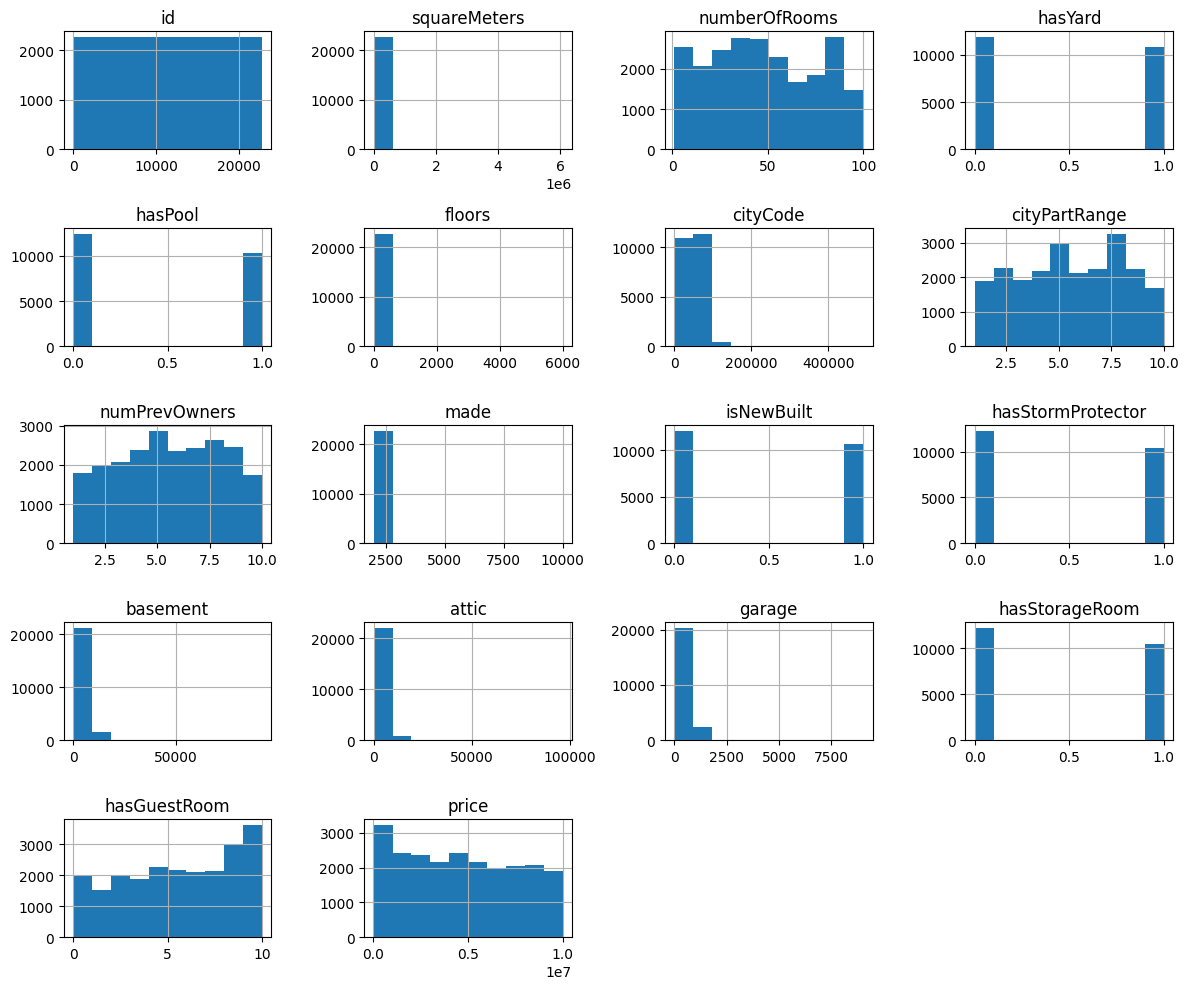

In [9]:
# Data Visualization - Histograms
train_df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

<Axes: >

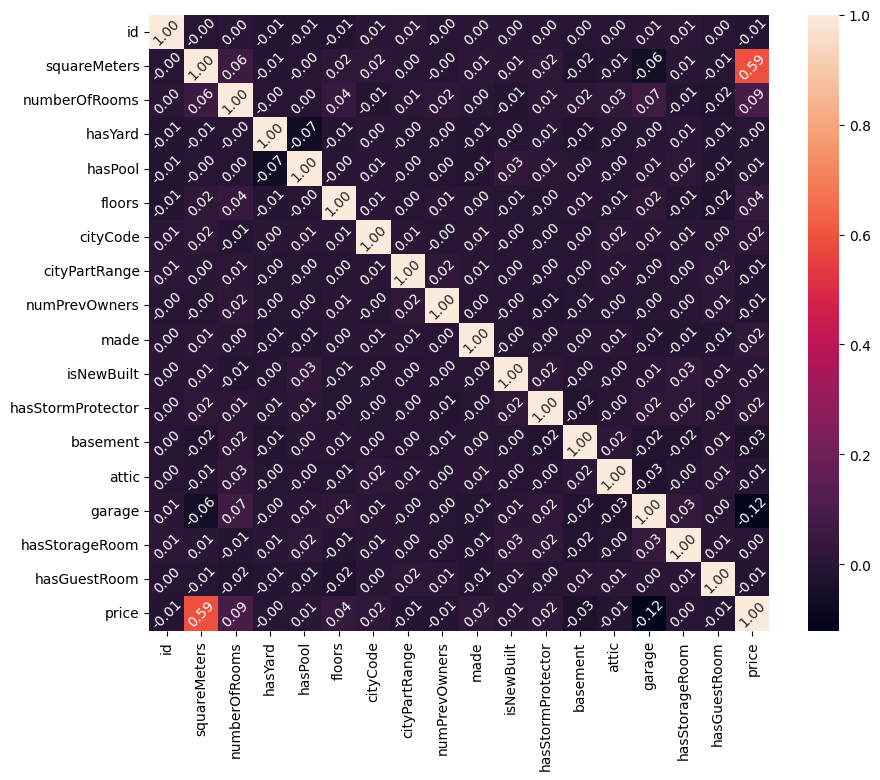

In [10]:
# Data Visualization - Heat map
plt.figure(figsize=(10,8))
sns.heatmap(train_df.corr(),annot=True,fmt=".2f",annot_kws={"size": 10, "rotation": 45})

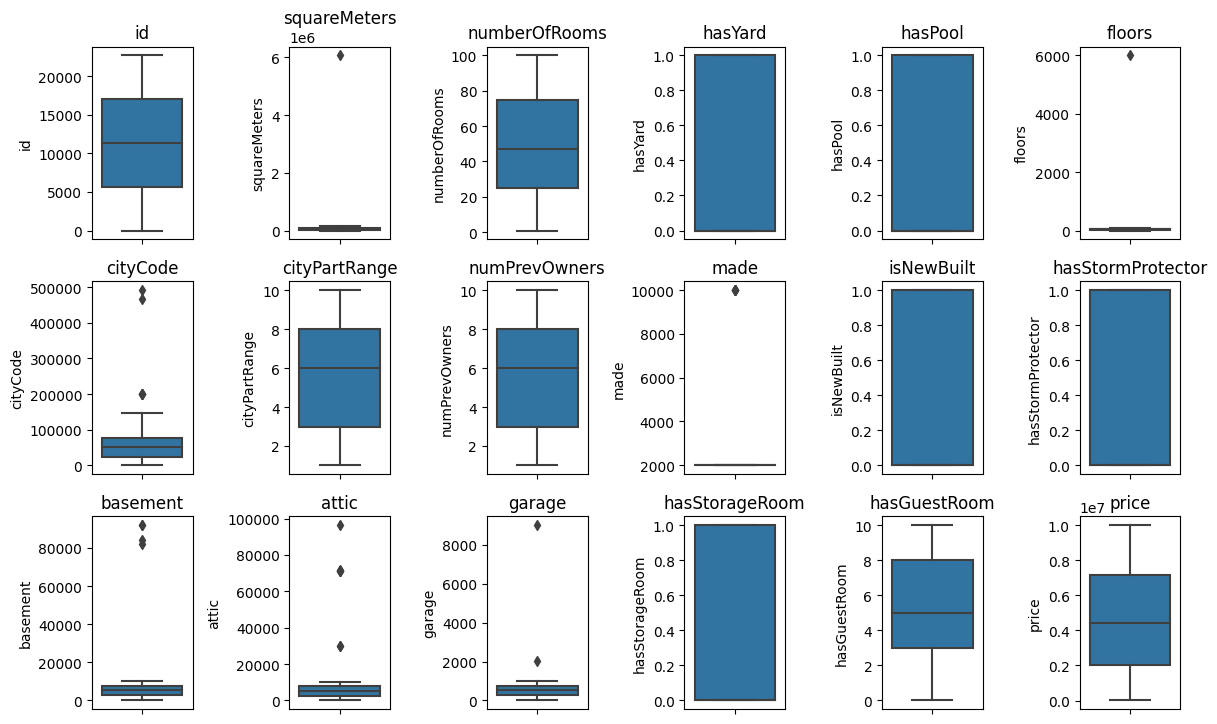

In [11]:
# Data Visualization - Box Plot
column_names = train_df.columns.tolist()
plt.figure(figsize=(12, 12))

for i, column_name in enumerate(column_names):
    plt.subplot(5, 6, i+1)
    sns.boxplot(y=train_df[column_name])
    plt.title(f"{column_name}")

plt.tight_layout()
plt.show()


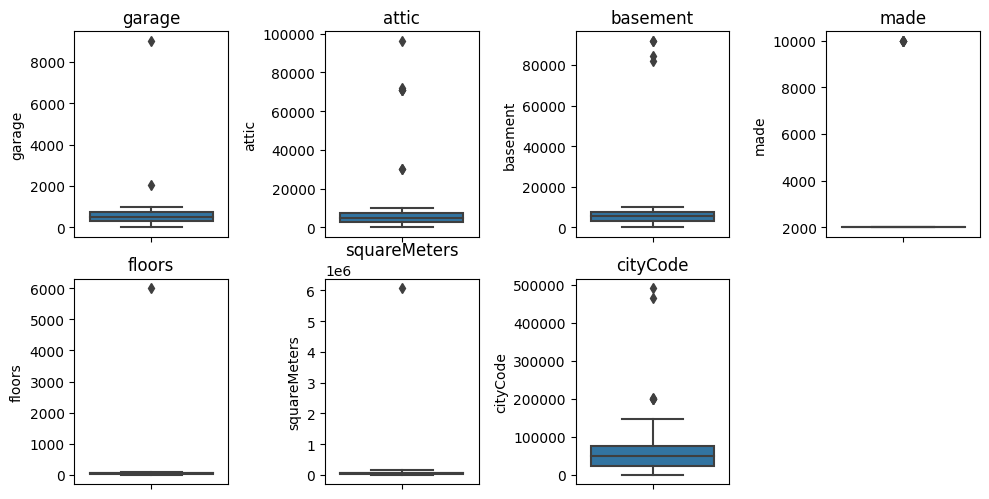

In [12]:
# Data Visualization - Box Plot with Outliers
column_names = ['garage', 'attic', 'basement', 'made', 'floors', 'squareMeters','cityCode']
plt.figure(figsize=(10, 10))

for i, column_name in enumerate(column_names):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=train_df[column_name])
    plt.title(f"{column_name}")

plt.tight_layout()
plt.show()


<Axes: xlabel='numberOfRooms', ylabel='Count'>

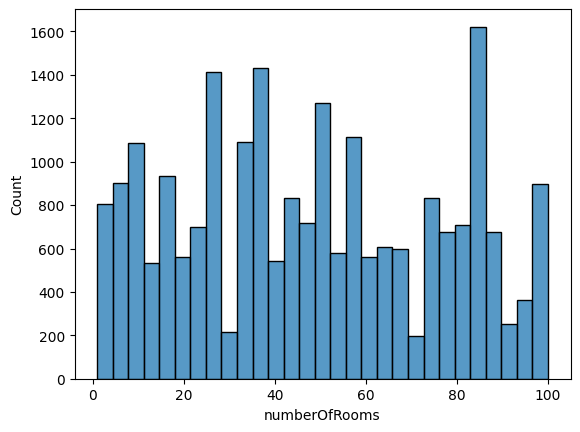

In [13]:
# Data Visualization - histogram
sns.histplot(train_df['numberOfRooms'])

#Data preprocessing

In [14]:
# Dataset columns
train_df.columns

Index(['id', 'squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

In [15]:
# Removed unwated coulmns
drop_cols = ['id','cityCode','hasYard']
train_df.drop(drop_cols, axis=1, inplace=True)
test_df.drop(drop_cols, axis=1, inplace=True)

In [16]:
# Coulmns after Removal of unwated coulmns
train_df.columns

Index(['squareMeters', 'numberOfRooms', 'hasPool', 'floors', 'cityPartRange',
       'numPrevOwners', 'made', 'isNewBuilt', 'hasStormProtector', 'basement',
       'attic', 'garage', 'hasStorageRoom', 'hasGuestRoom', 'price'],
      dtype='object')

In [17]:
# Remove ouliers from the dataframes
columns_to_clean = ["garage", "attic", "basement", "made", "floors","squareMeters"]

# Loop through each column
for column_name in columns_to_clean:
    # Calculate the IQR
    Q1 = train_df[column_name].quantile(0.25)
    Q3 = train_df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify and remove outlier rows
    train_df = train_df[(train_df[column_name] >= lower_bound) & (train_df[column_name] <= upper_bound)]

    # Print the effect of outlier removal
    print(f"Column: {column_name}")
    print("train_df size after removing outliers:", train_df.shape)
    print("--------------------------")




Column: garage
train_df size after removing outliers: (22728, 15)
--------------------------
Column: attic
train_df size after removing outliers: (22721, 15)
--------------------------
Column: basement
train_df size after removing outliers: (22717, 15)
--------------------------
Column: made
train_df size after removing outliers: (22712, 15)
--------------------------
Column: floors
train_df size after removing outliers: (22711, 15)
--------------------------
Column: squareMeters
train_df size after removing outliers: (22710, 15)
--------------------------


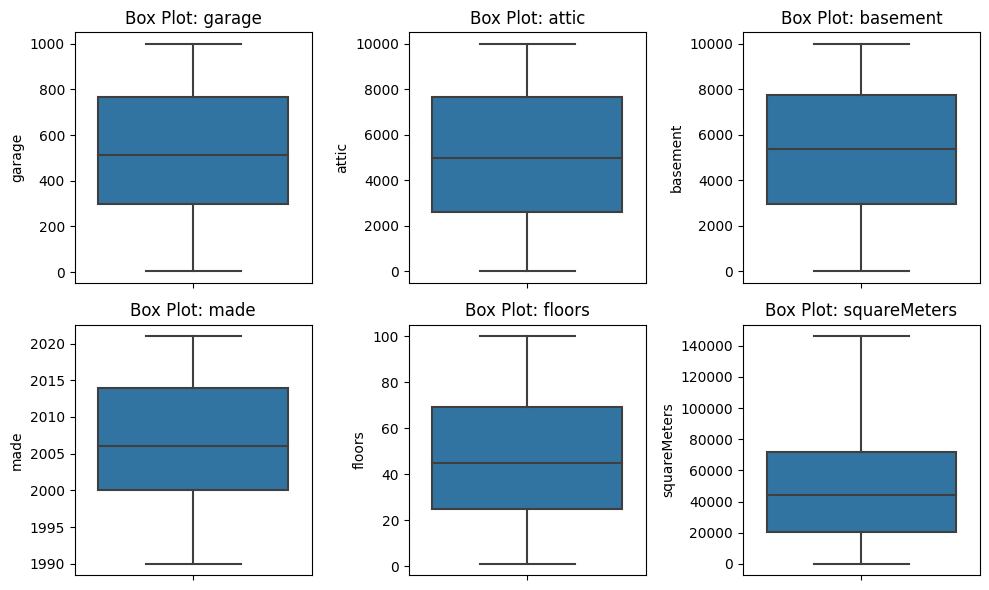

In [18]:
# Data Visualization - Box plot (after outlier removel)
column_names = ["garage", "attic", "basement", "made", "floors","squareMeters"]

# Create a figure with subplots for each column
plt.figure(figsize=(10, 6))

for i, column_name in enumerate(column_names):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=train_df[column_name])
    plt.title(f"Box Plot: {column_name}")


plt.tight_layout()
plt.show()


### Feature engineering

In [19]:
# Calculate the age of the property
current_year = 2023

# Calculate the age of the property for the training dataset
train_df['age'] = current_year - train_df['made']

# Calculate the age of the property for the test dataset
test_df['age'] = current_year - test_df['made']


<Axes: >

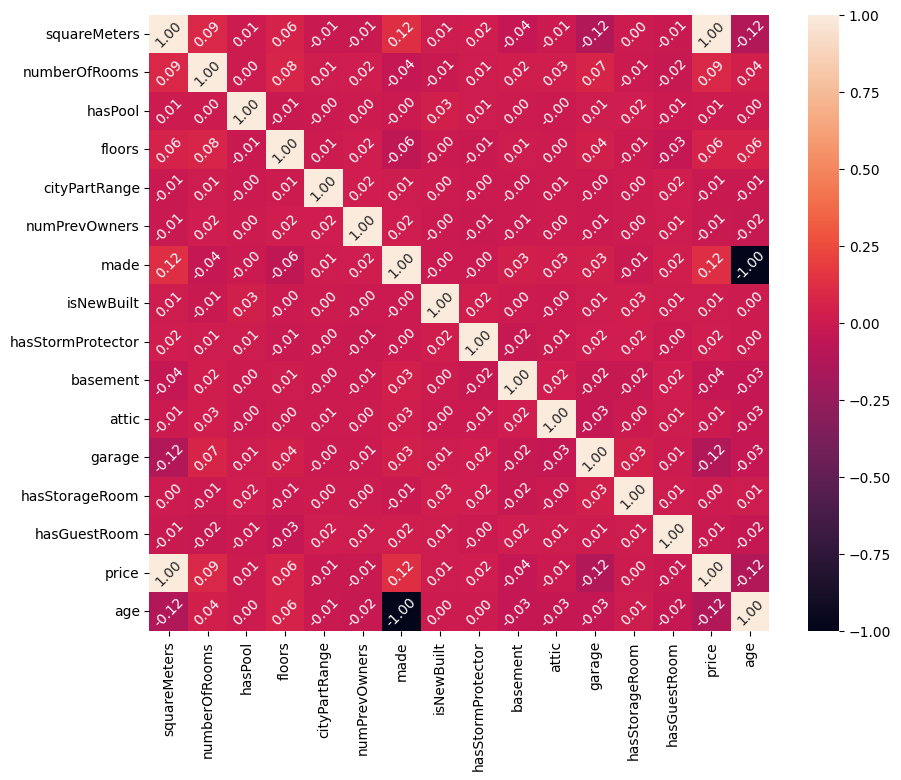

In [20]:
# Data Visualization - Heat map after Feature engineering
plt.figure(figsize=(10,8))
sns.heatmap(train_df.corr(),annot=True,fmt=".2f",annot_kws={"size": 10, "rotation": 45})

In [21]:
# Separate features and target variable
X = train_df.drop('price', axis=1)
y = train_df['price']

In [22]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Creation

In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define the models to evaluate
models = [
    RandomForestRegressor(),
    LinearRegression(),
    DecisionTreeRegressor(),
    GradientBoostingRegressor(),
    AdaBoostRegressor(),
    XGBRegressor(),
    LGBMRegressor(),
]

# Create a dictionary to store trained models
trained_models = {}


for model in models:
    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate Root Mean Squared Error (RMSE) to evaluate the model's performance
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)

    # Calculate R-squared (R²) score
    r2 = r2_score(y_test, y_pred)

    model_name = type(model).__name__
    print(f"Metrics for {model_name}:")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R-squared (R²): {r2}\n")


    # Store the trained model in the dictionary
    trained_models[model_name] = model


Metrics for RandomForestRegressor:
Root Mean Squared Error (RMSE): 205743.22506798702
Mean Absolute Error (MAE): 13614.211303350423
R-squared (R²): 0.9950779714159422

Metrics for LinearRegression:
Root Mean Squared Error (RMSE): 186916.10059598734
Mean Absolute Error (MAE): 14877.072603511178
R-squared (R²): 0.9959375645844672

Metrics for DecisionTreeRegressor:
Root Mean Squared Error (RMSE): 234164.22477302118
Mean Absolute Error (MAE): 10934.363782474724
R-squared (R²): 0.9936242080790093

Metrics for GradientBoostingRegressor:
Root Mean Squared Error (RMSE): 172005.46511448434
Mean Absolute Error (MAE): 25279.35595365006
R-squared (R²): 0.996559848752379

Metrics for AdaBoostRegressor:
Root Mean Squared Error (RMSE): 1070451.3507261656
Mean Absolute Error (MAE): 839558.2617431965
R-squared (R²): 0.8667623653608634

Metrics for XGBRegressor:
Root Mean Squared Error (RMSE): 189268.97503348265
Mean Absolute Error (MAE): 21397.0034314282
R-squared (R²): 0.9958346461057004

[LightGBM] 

# Hyper Parameter Tuning

In [ ]:
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.model_selection import GridSearchCV

# # Define the GradientBoostingRegressor model
# gbm = GradientBoostingRegressor()

# # Define the hyperparameter grid to search
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 4, 5],
#     'min_samples_split': [2, 4, 6],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Create the GridSearchCV object
# grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# # Fit the GridSearchCV to your training data
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters and the best estimator
# best_params = grid_search.best_params_
# best_estimator = grid_search.best_estimator_

# # Print the best hyperparameters
# print("Best Hyperparameters:")
# print(best_params)

# # Train the best model on your training data
# best_estimator.fit(X_train, y_train)

# # Make predictions on the test data
# y_pred = best_estimator.predict(X_test)

# # Calculate Root Mean Squared Error (RMSE) to evaluate the model's performance
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# # Calculate Mean Absolute Error (MAE)
# mae = mean_absolute_error(y_test, y_pred)

# # Calculate R-squared (R²) score
# r2 = r2_score(y_test, y_pred)

# print(f"Metrics for GradientBoostingRegressor:")
# print(f"Root Mean Squared Error (RMSE): {rmse}")
# print(f"Mean Absolute Error (MAE): {mae}")
# print(f"R-squared (R²): {r2}")


# Model Stack

In [24]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

# Define the base models
base_models = [
    ('RandomForest', RandomForestRegressor(n_estimators=10, max_depth=20, min_samples_split=2, random_state=42)),
    ('GradientBoosting', GradientBoostingRegressor())
]

# Create the StackingRegressor
stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=LinearRegression()
)

# Train the stacking model
stacking_model.fit(X_train, y_train)


StackingRegressor(estimators=[('RandomForest',
                               RandomForestRegressor(max_depth=20,
                                                     n_estimators=10,
                                                     random_state=42)),
                              ('GradientBoosting',
                               GradientBoostingRegressor())],
                  final_estimator=LinearRegression())

In [25]:
# Make predictions on the test data using the stacking model
y_pred_stacking = stacking_model.predict(X_test)

# Calculate Root Mean Squared Error (RMSE) to evaluate the stacking model's performance
rmse_stacking = np.sqrt(mean_squared_error(y_test, y_pred_stacking))

# Calculate Mean Absolute Error (MAE)
mae_stacking = mean_absolute_error(y_test, y_pred_stacking)

# Calculate R-squared (R²) score
r2_stacking = r2_score(y_test, y_pred_stacking)

print("Metrics for Stacking Model:")
print(f"Root Mean Squared Error (RMSE): {rmse_stacking}")
print(f"Mean Absolute Error (MAE): {mae_stacking}")
print(f"R-squared (R²): {r2_stacking}")


Metrics for Stacking Model:
Root Mean Squared Error (RMSE): 163949.45838345963
Mean Absolute Error (MAE): 14637.094954380682
R-squared (R²): 0.9968745466746908


In [26]:
# Make predictions on the unseen data using the stacking model
y_pred_unseen = stacking_model.predict(test_df)


#Save Model

In [ ]:
# import pickle

# # Define the path where you want to save the model
# path = '/content/drive/MyDrive/MI_Dataset/House_Price/HP_stacking_model.pkl'

# # Save the stacking model to the specified path
# with open(path, 'wb') as model_file:
#     pickle.dump(stacking_model, model_file)

# print(f"Stacking model saved to {path}")


In [28]:
# # Load the sample submission file to get the 'id' column
# ss = pd.read_csv("/content/drive/MyDrive/MI_Dataset/House_Price/sample_submission.csv", usecols=['id'])

# # Create a DataFrame with 'id' from the sample submission and 'price' from test_pred
# submission_df = pd.DataFrame({'id': ss['id'], 'price': y_pred_unseen})

# # Save the DataFrame as a CSV file
# submission_df.to_csv("/content/drive/MyDrive/MI_Dataset/House_Price/submissionV6.csv", index=False)